## Notebook Context
## Goal - Compute training dataset statistics
## Data - LiTS datasets from <a>http://medicaldecathlon.com/</a>

In [3]:
import os
import cv2 as cv
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## Q1: How many scan volumes are available in the dataset?
## Q2: How many scan frames are available in the dataset?
## Q3: What is the distribution of number of frames per scan across scan volumes?

In [4]:
datasetSamplesPath = "../data/training_images/"
scanVolumesDirectories = os.listdir(datasetSamplesPath)

framesPerScanVolume = {}

for scanVolumeDirectory in scanVolumesDirectories:
    scanVolumePath = datasetSamplesPath + scanVolumeDirectory
    frames = glob(scanVolumePath + "/*.bmp")
    framesPerScanVolume[scanVolumeDirectory] = len(frames)

print(f"Total scan volumes in the dataset: {len(framesPerScanVolume.keys())}")
print(f"Total scan frames in the dataset: {sum(list(framesPerScanVolume.values()))}")

Total scan volumes in the dataset: 131
Total scan frames in the dataset: 58638


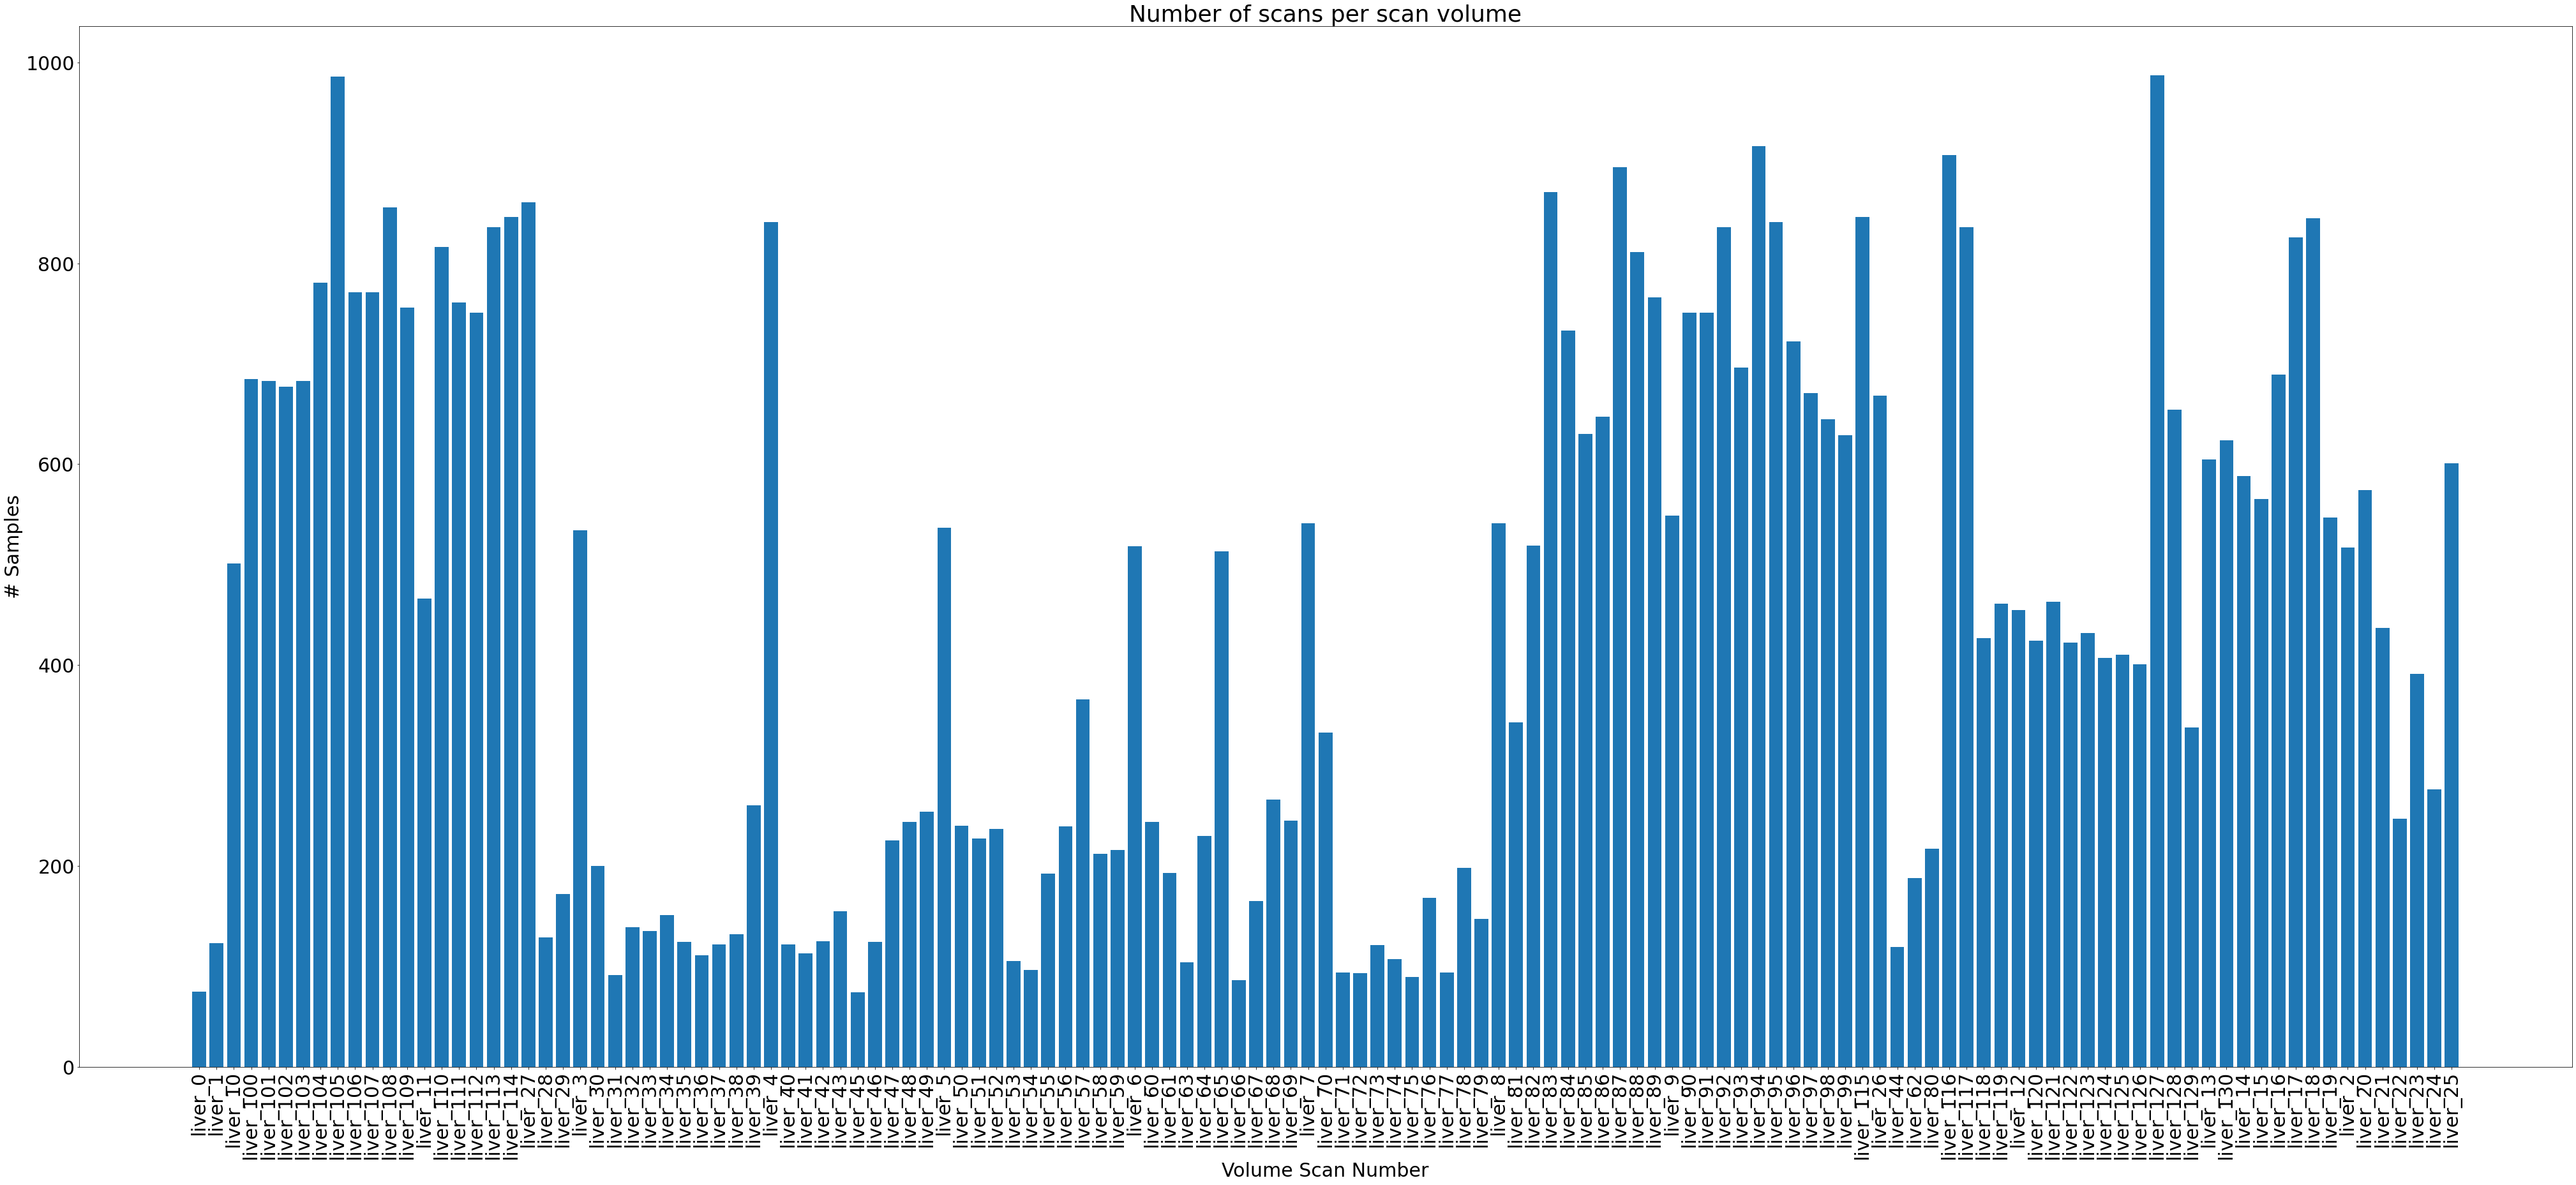

In [5]:
plt.figure(figsize=(70, 30))
plt.rcParams.update({'font.size': 30})
plt.bar(list(framesPerScanVolume.keys()), list(framesPerScanVolume.values()))
plt.xticks(rotation=90)
plt.ylabel("# Samples")
plt.xlabel("Volume Scan Number")
plt.title("Number of scans per scan volume")
plt.show()

## Q4: How many annotated scan volumes are available in the dataset?
## Q5: How many annotated scan frames are available in the dataset?
## Q6: What is the distribution of number of annotated frames per scan across scan volumes?

In [6]:
datasetLabelsPath = "../data/training_labels/"
scanVolumesDirectories = os.listdir(datasetLabelsPath)

annotatedFramesPerScanVolume = {}

for scanVolumeDirectory in scanVolumesDirectories:
    scanVolumePath = datasetLabelsPath + scanVolumeDirectory
    frames = glob(scanVolumePath + "/*.bmp")
    annotatedFramesPerScanVolume[scanVolumeDirectory] = len(frames)

print(f"Total annotated scan volumes in the dataset: {len(framesPerScanVolume.keys())}")
print(f"Total annotated scan frames in the dataset: {sum(list(framesPerScanVolume.values()))}")

Total annotated scan volumes in the dataset: 131
Total annotated scan frames in the dataset: 58638


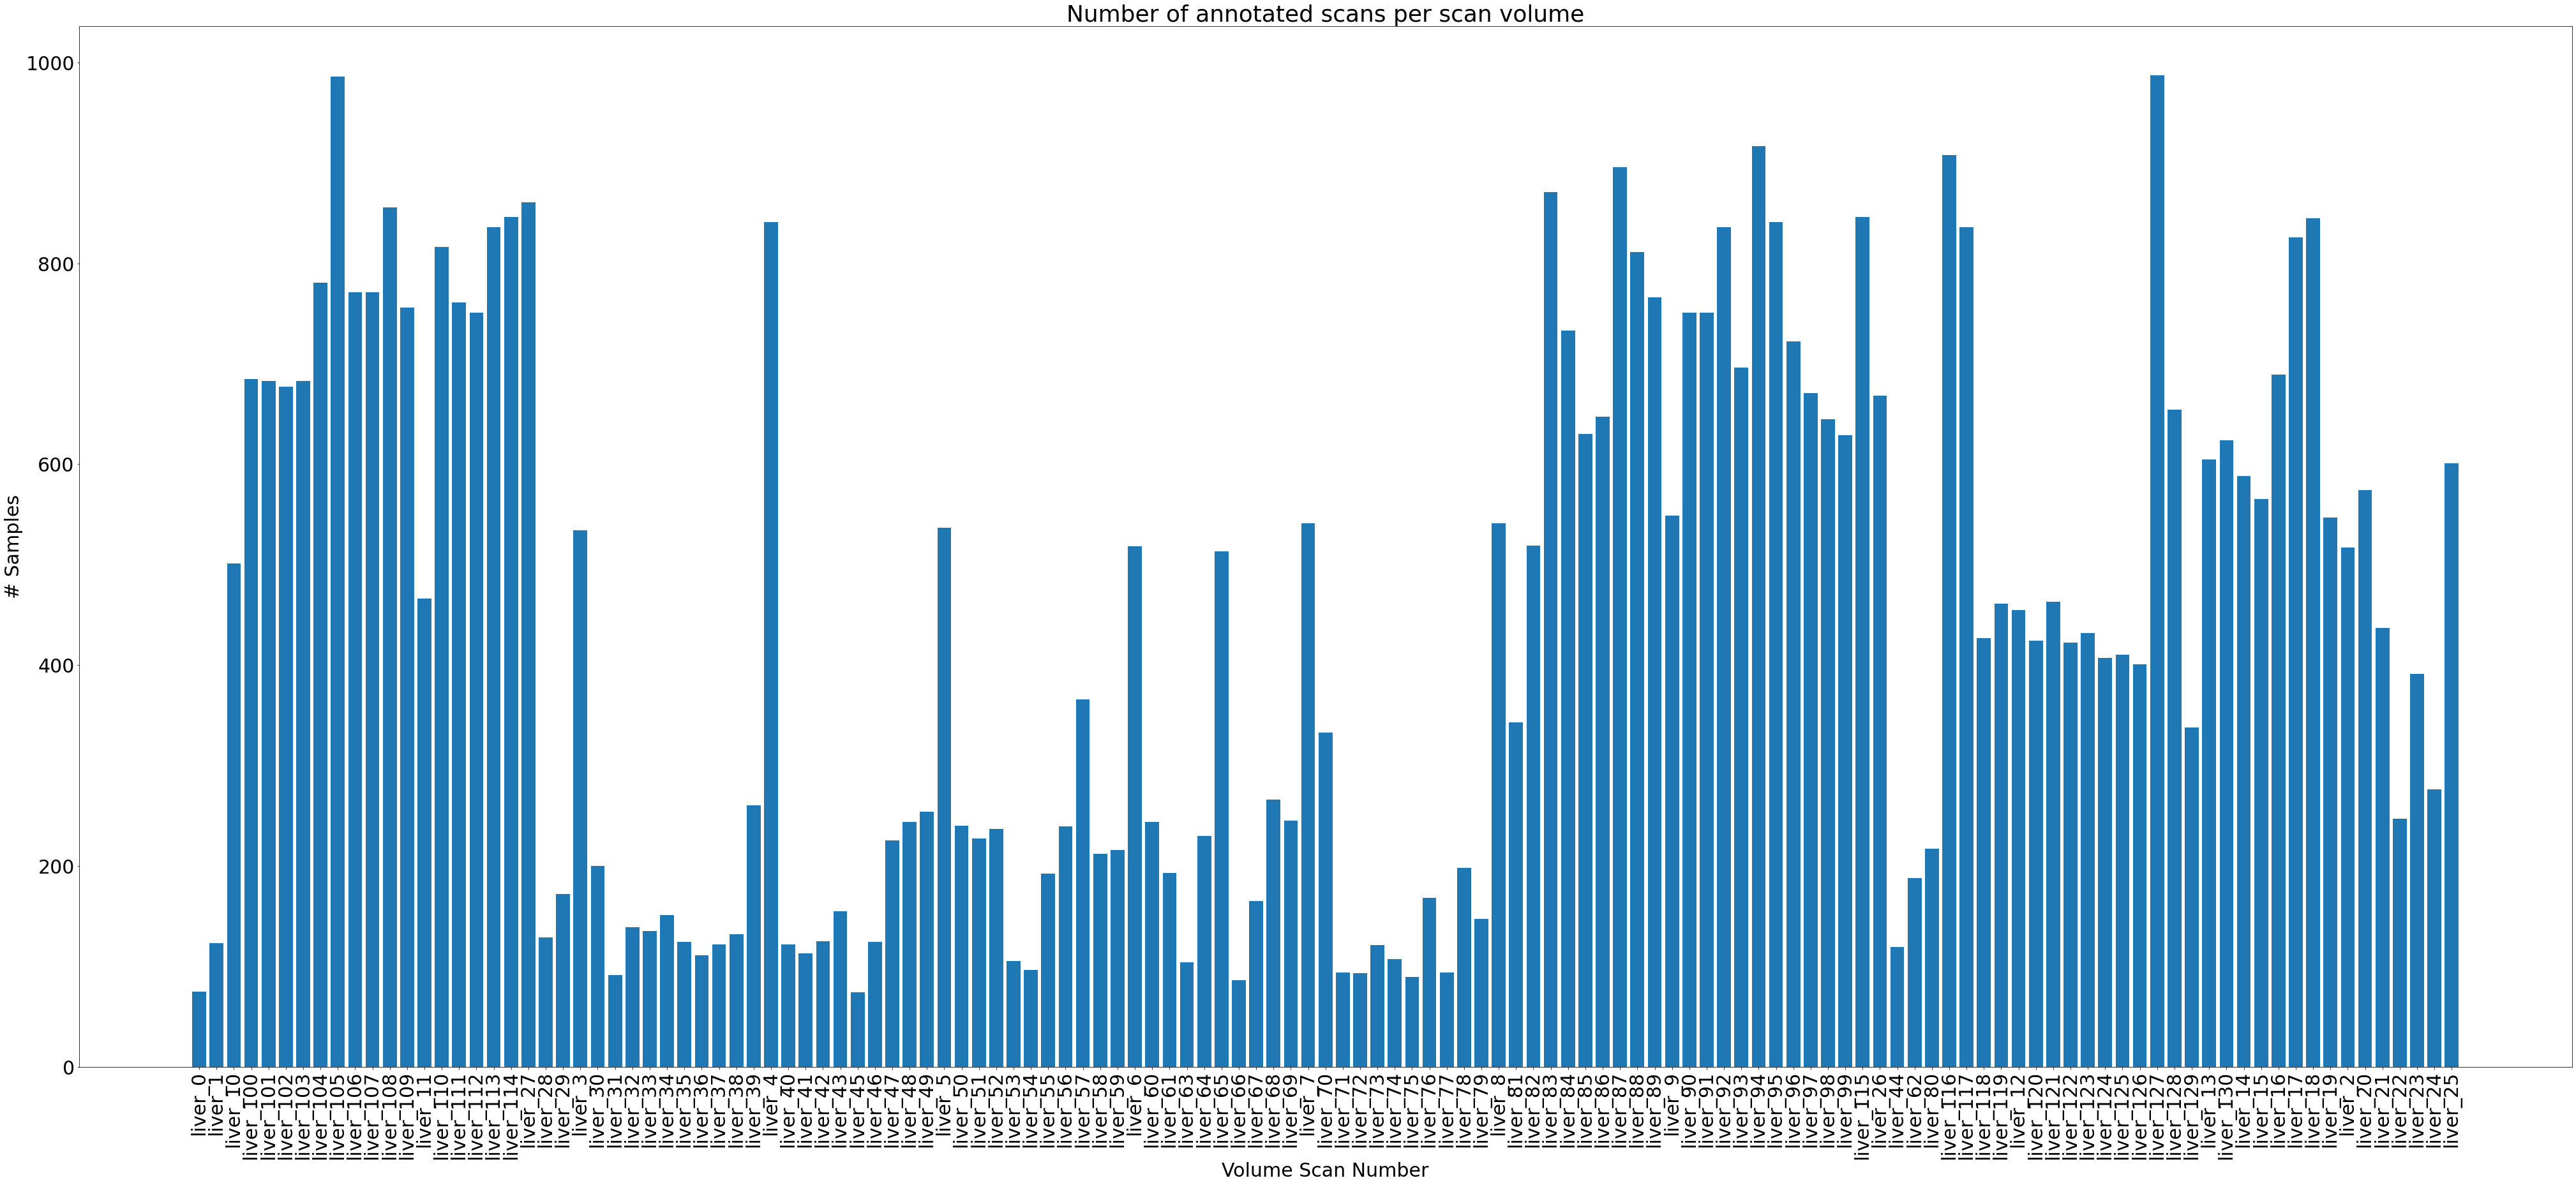

In [7]:
plt.figure(figsize=(70, 30))
plt.rcParams.update({'font.size': 30})
plt.bar(list(annotatedFramesPerScanVolume.keys()), list(annotatedFramesPerScanVolume.values()))
plt.xticks(rotation=90)
plt.ylabel("# Samples")
plt.xlabel("Volume Scan Number")
plt.title("Number of annotated scans per scan volume")
plt.show()

## Q7: Compare the distribution of acquired frames per volume with the distribution of annotated frames per volume

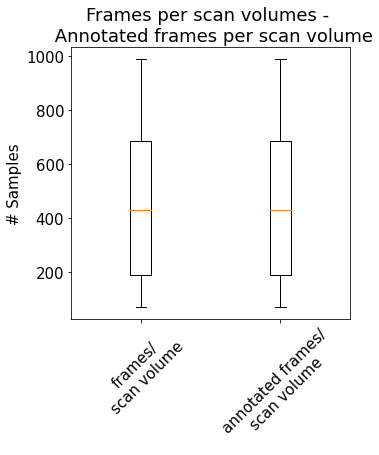

In [8]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(5, 5))
plt.boxplot([list(framesPerScanVolume.values()), list(annotatedFramesPerScanVolume.values())], labels=["frames/\nscan volume", "annotated frames/\nscan volume"])
plt.xticks(rotation=45)
plt.ylabel("# Samples")
plt.title("Frames per scan volumes - \n Annotated frames per scan volume")
plt.show()

## Q8: What is the overall class imbalance in the dataset annotations per scan volume?
### Measured in pixel percentage/class

In [ ]:
BACKGROUND_PIXELS_LABEL = 0
LIVER_PIXELS_LABEL = 1
CANCER_PIXELS_LABEL = 2

backgroundPixelsPercentages = {}
liverPixelsPercentages = {}
cancerPixelsPercentages = {}

for labelledVolumeScanDirectory in scanVolumesDirectories:
    annotatedScanSamplesPaths = glob(os.path.join(datasetLabelsPath, labelledVolumeScanDirectory, "*.bmp"))
    backgroundPixels = 0
    liverPixels = 0
    cancerPixels = 0
    for annotatedScanSamplesPath in annotatedScanSamplesPaths:
        mask = cv.imread(annotatedScanSamplesPath, cv.IMREAD_UNCHANGED)
        backgroundPixels += mask[mask == BACKGROUND_PIXELS_LABEL].shape[0]
        liverPixels += mask[mask == LIVER_PIXELS_LABEL].shape[0]
        cancerPixels += mask[mask == CANCER_PIXELS_LABEL].shape[0]
    
    totalPixels = backgroundPixels + liverPixels + cancerPixels
    backgroundPixelsPercentage = np.round((backgroundPixels / totalPixels) * 100, 2)
    liverPixelsPercentage = np.round((liverPixels / totalPixels) * 100, 2)
    cancerPixelsPercentage = np.round((cancerPixels / totalPixels) * 100, 2)
    
    backgroundPixelsPercentages[labelledVolumeScanDirectory] = backgroundPixelsPercentage
    liverPixelsPercentages[labelledVolumeScanDirectory] = liverPixelsPercentage
    cancerPixelsPercentages[labelledVolumeScanDirectory] = cancerPixelsPercentage

    plt.figure()
    plt.pie([backgroundPixels, liverPixels, cancerPixels])
    plt.legend(labels=[f"Background - {backgroundPixelsPercentage}%", f"Liver - {liverPixelsPercentage}%", f"Cancer - {cancerPixelsPercentage}%"])
    plt.title(labelledVolumeScanDirectory)
    plt.savefig(f"../data/stats/class_imbalance_per_scan_volume/{labelledVolumeScanDirectory}")

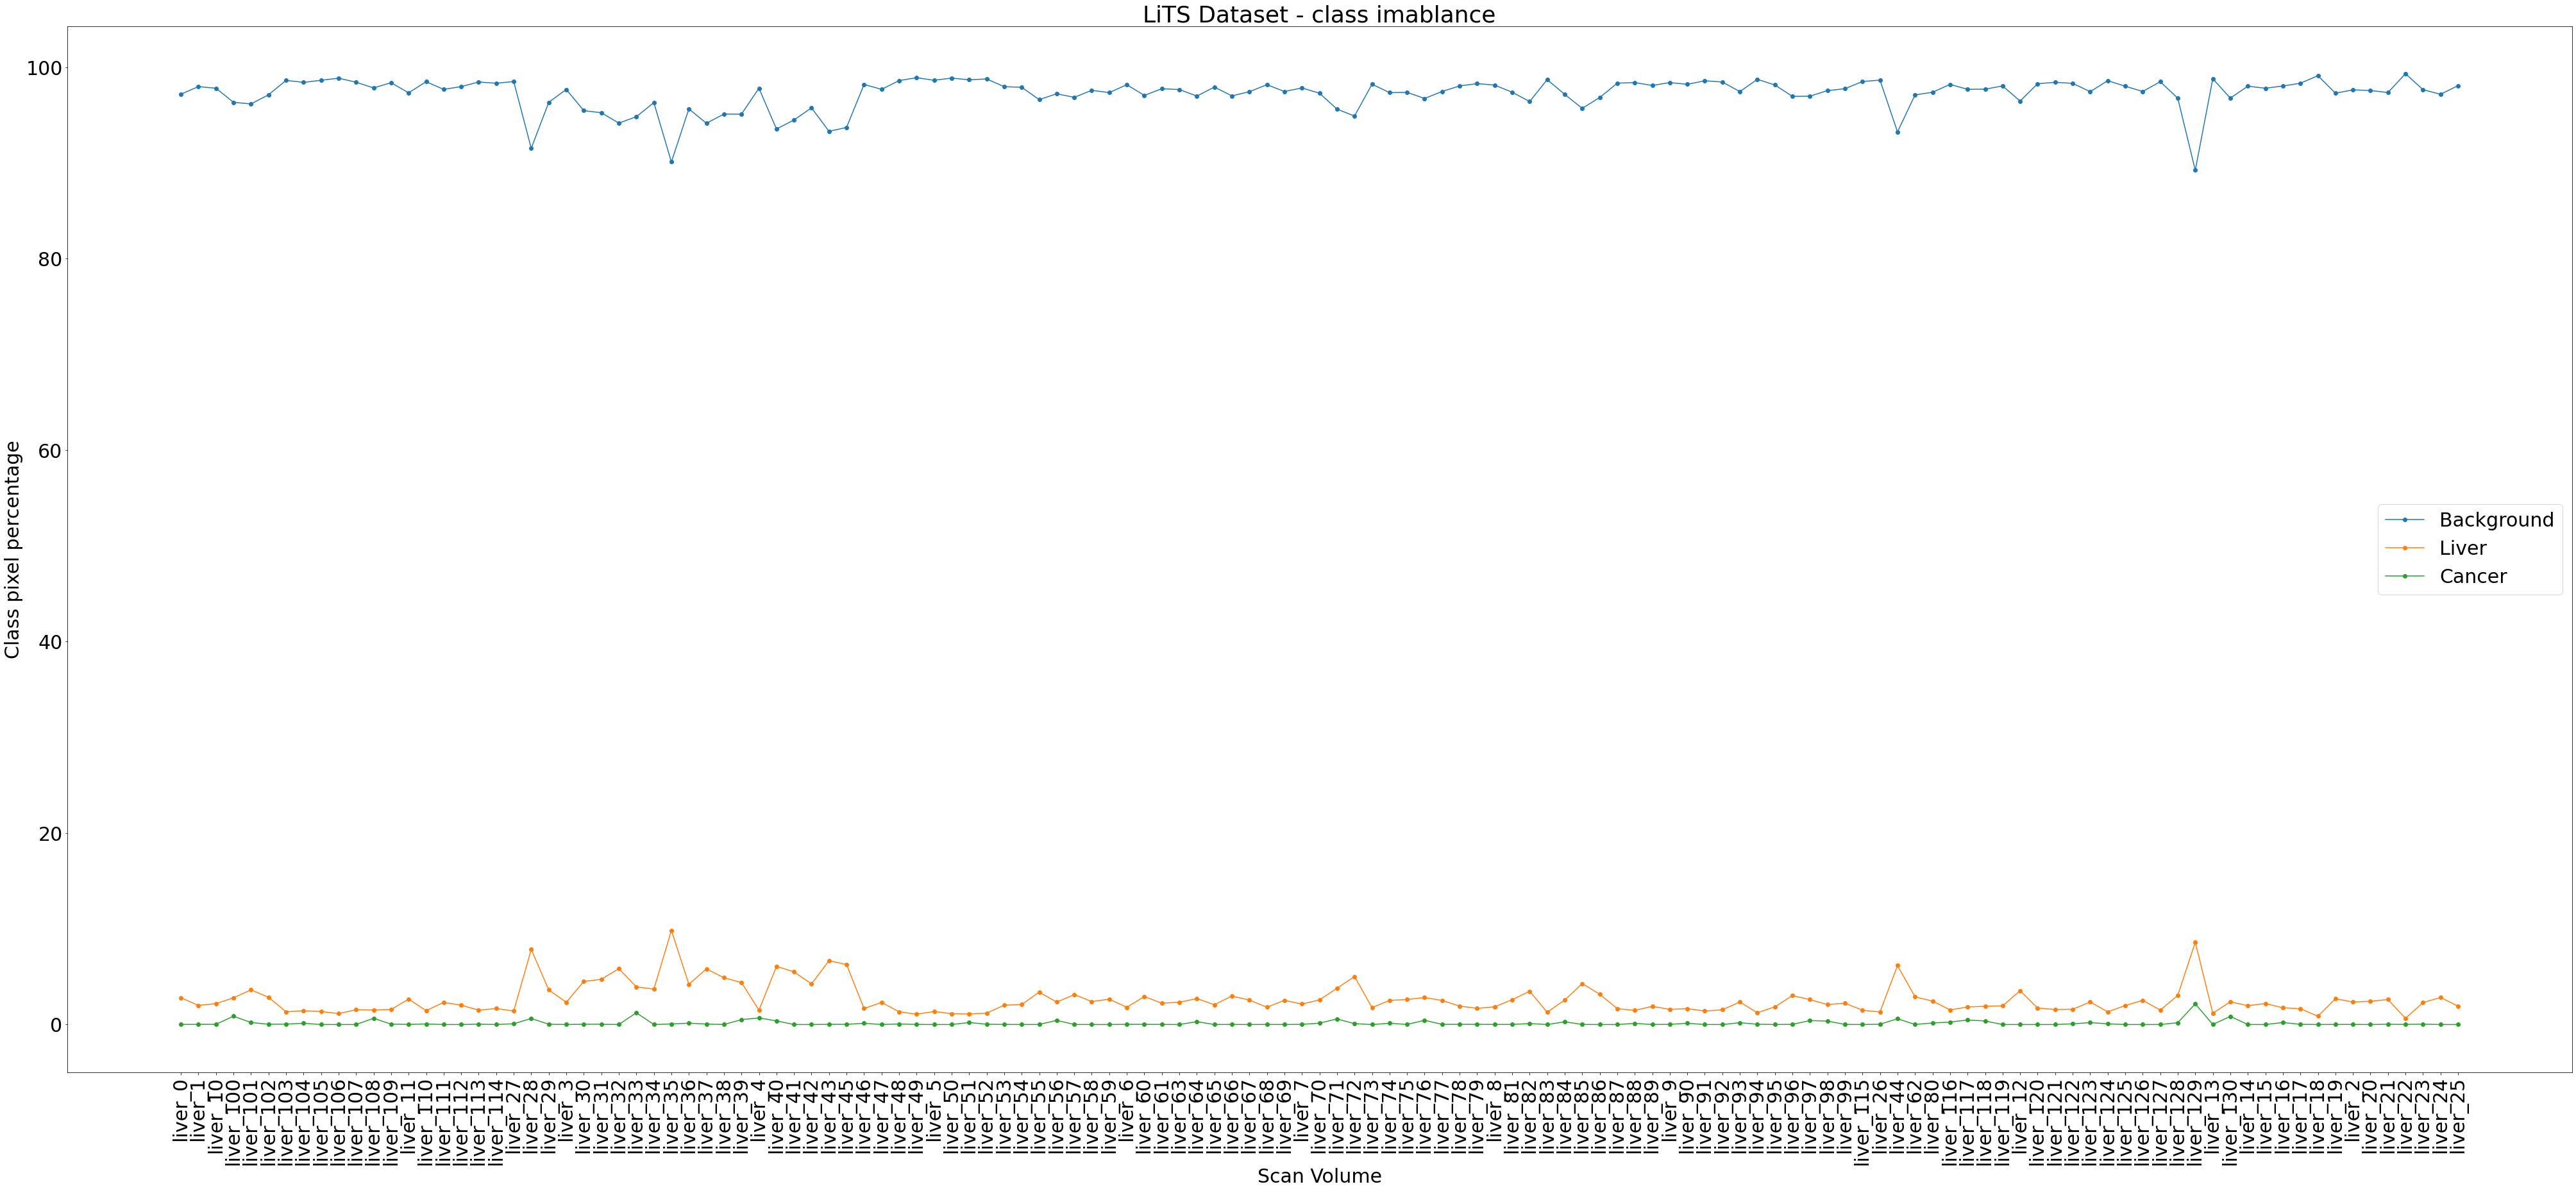

In [14]:
plt.figure(figsize=(70, 30))
plt.rcParams.update({'font.size': 30})
plt.xticks(rotation=90)
plt.plot(backgroundPixelsPercentages.keys(), backgroundPixelsPercentages.values(), marker="o", label="Background")
plt.plot(liverPixelsPercentages.keys(), liverPixelsPercentages.values(), marker="o", label="Liver")
plt.plot(cancerPixelsPercentages.keys(), cancerPixelsPercentages.values(), marker="o", label="Cancer")
plt.title("LiTS Dataset - class imablance")
plt.xlabel("Scan Volume")
plt.ylabel("Class pixel percentage")
plt.legend()
plt.show()